**Practice to make a polynmial in numpy.**

```
import numpy as np
x=[1,2,3] 
np.poly1d(x)
```



In [ ]:
import numpy as np
x=[1,1,1] # here 1,2,3 are coefficients of the polynomial in descending order
Poly1=np.poly1d(x)
print(Poly1)

Poly2=np.poly1d(x,True) #another format to print polynomial
print(Poly2)

   2
1 x + 1 x + 1
   3     2
1 x - 3 x + 3 x - 1



**Code to read data from a CSV file**
```
import pandas as pd
import numpy as np

# Read data from CSV file
df = pd.read_csv('data.csv')

# Convert data to numpy arrays
x = df['x values'].values
y = df['y values'].values

```



**Function for getting Lagrange Polynmial**


In [ ]:


x = [0, 20,40,60,80,100]
y = [26.0, -48.6, 61.6,-71.2,74.8,-75.2]


# Function to calculate Lagrange polynomial
def lagrange_poly(x, y):
    n = len(x)
    p = np.poly1d(0.0)
    for i in range(n):
        L = np.poly1d(y[i]) 
        for j in range(n):
            if j != i:
                L *= np.poly1d([1.0, -x[j]]) / (x[i] - x[j])
        p += L
    return p

# Calculate Lagrange polynomial
p = lagrange_poly(x, y)
print(p)

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26


In [ ]:
p(35)

72.08498535156284

In [ ]:
lagrange_poly([0,1,3], [3,8,9])

poly1d([-1.5,  6.5,  3. ])

**For Interpolating at a specific point**

In [ ]:
# Interpolate at a specific point
point = float(input("Enter x-coordinate to interpolate: "))
interp_value = p(point)

# Print Lagrange polynomial and interpolated value
print("Lagrange polynomial is:")
print(p)
print("Interpolated value at x =", point, "is:", interp_value)


Enter x-coordinate to interpolate: 12
Lagrange polynomial is:
            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26
Interpolated value at x = 12.0 is: -143.55093760000003


**Plotting of Lagrange Polynomial**

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26


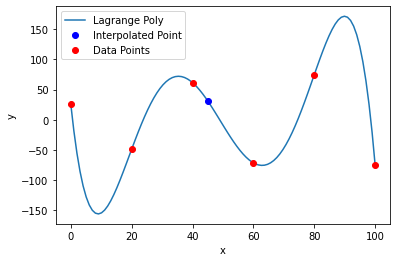

In [ ]:
import matplotlib.pyplot as plt
xi=45
yi=31.29079589843832
p = lagrange_poly(x[0:6], y[0:6])
print(p)
xp=np.linspace(0,x[5],100)
yp=p(xp)

plt.plot(xp, yp, label='Lagrange Poly')
plt.plot(xi, yi, 'bo', label='Interpolated Point')
plt.plot(x[0:6], y[0:6], 'ro', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

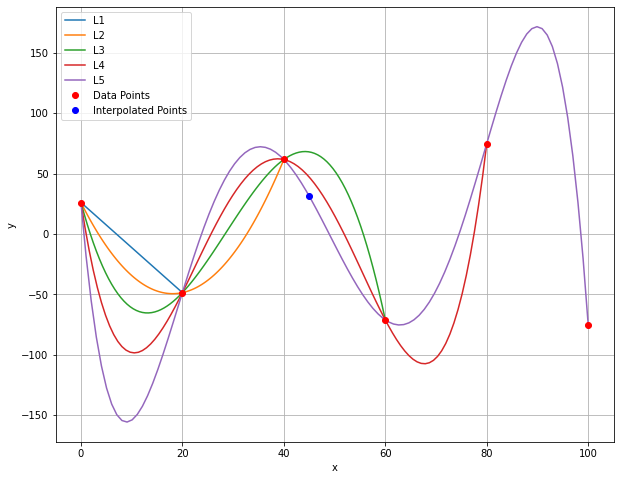

In [ ]:
fig = plt.figure(figsize = (10,8))
x = [0, 20,40,60, 80, 100]
y = [26.0, -48.6, 61.6,-71.2, 74.8, -75.2]
n=5
for i in range(1,n+1,1):
  p = lagrange_poly(x[0:i+1], y[0:i+1])
  xp=np.linspace(0,x[i],100)
  yp=p(xp)
  plt.plot(xp, yp, label = f"L{i}")
plt.plot(x,y,'ro',label="Data Points")
plt.plot(xi,yi,'bo',label="Interpolated Points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

**Scipy Implimentation of Lagrange Polynomial**

P(45) = 31.29079589843832
Lagrange Polynomial: [-5.32864583e-06  1.31302083e-03 -1.13188542e-01  3.98529167e+00
 -4.78120000e+01  2.60000000e+01]


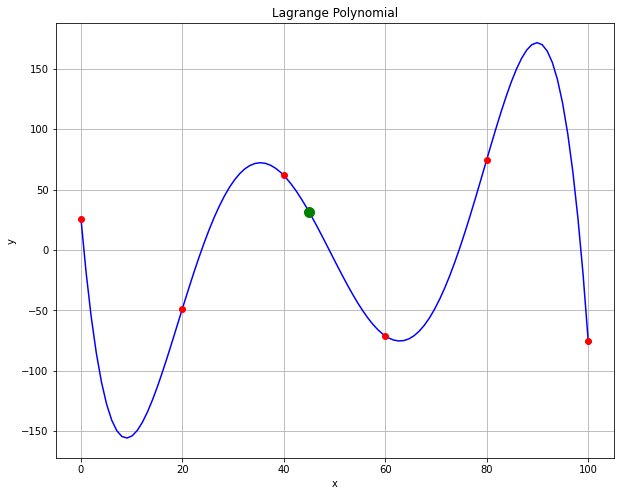

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the data points
x = np.array([0, 20, 40, 60, 80, 100])
y = np.array([26.0, -48.6, 61.6, -71.2, 74.8, -75.2])

# Define the Lagrange Polynomial
f = lagrange(x, y)

# Find P(50) by evaluating the polynomial at x=50
p_45 = f(45)
print("P(45) =", p_45)

# Print the polynomial coefficients
print("Lagrange Polynomial:", np.poly1d(f).coefficients)

# Plot the Lagrange Polynomial and the data points
x_new = np.linspace(0, 100, 100)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.plot(45, p_45, 'go', markersize=10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**Code for Newton divided difference Method**

In [ ]:
import numpy as np
def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F
def newton_div_dif_poly(x,y,xi):
   F=divided_difference_table(x,y) # Saving divided difference in a variable F
   n=len(x)
   prod=np.poly1d(1)
   N=np.poly1d(F[0][0])
   for i in range(1,n):
     prod=np.poly1d(x[0:i],True)
     N+=np.poly1d(F[i][i]*(prod.c))
     
   print(N)
   print(N(xi))
   return 

x = [0, 20,40,60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]
newton_div_dif_poly(x, y, 45)

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26
31.29079589843672


In [ ]:
divided_difference_table([1,2,3], [2,3,6])

[[2, 0, 0], [3, 1.0, 0], [6, 3.0, 1.0]]

# LAB Tasks

*  Find the Lagrange Polynomial for x=[-1,2,3,4,6] and y=[4,5,7,9,13] and interpolate y at x=5 
*   Graph the task 1 (Lagrange polynomial, Data points, interpolated point)
*   Construct the Newton Divided Difference Table for the data in task 1
*   Solve the task 1 for Newton's Divided Difference method
*   Write the code for Newton Forward difference method (in terms of s) (Hint: code is quite similar to code of divided differece method)
*   Run the code of above task on x=[-1.5,-1,-0.5,0,1] and y=[2,6,10.1,13.2,12.2] and xi=-1.2
*   Write the code for Newton Backward difference method
*   Run the code of above task on x=[-1.5,-1,-0.5,0,1] and y=[2,6,10.1,13.2,12.2] and xi=0.7











In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task1
print("\n\t\t\t\tTASK 1\n\n")
x = np.array([-1,2,3,4,6])
y = np.array([4,5,7,9,13])
f = lagrange(x, y)
p = f(5)
print("P(5) =", p)
print("Lagrange Polynomial:\n", np.poly1d(f))


				TASK 1


P(5) = 10.928571428571555
Lagrange Polynomial:
         4          3          2
0.0119 x - 0.1786 x + 0.9524 x - 0.1429 x + 2.714



				TASK 2




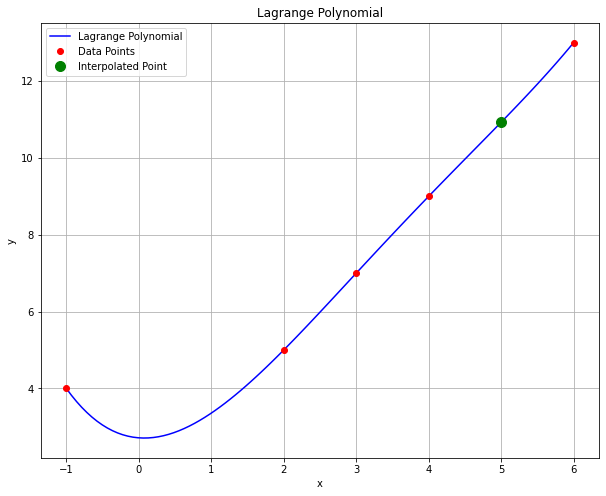

In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task2
print("\n\t\t\t\tTASK 2\n\n")
x_new = np.linspace(-1, 6, 100)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', label = 'Lagrange Polynomial')
plt.plot(x, y, 'ro', label = 'Data Points')
plt.plot(5, p, 'go', markersize=10, label = 'Interpolated Point')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task3
print("\n\t\t\t\tTASK 3\n\n")
def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F
print(divided_difference_table(x, y))


				TASK 3


[[4, 0, 0, 0, 0], [5, 0.3333333333333333, 0, 0, 0], [7, 2.0, 0.4166666666666667, 0, 0], [9, 2.0, 0.0, -0.08333333333333334, 0], [13, 2.0, 0.0, 0.0, 0.011904761904761906]]


In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task4
print("\n\t\t\t\tTASK 4\n\n")
def newton_div_dif_poly(x,y,xi):
   F=divided_difference_table(x,y)
   n=len(x)
   prod=np.poly1d(1)
   N=np.poly1d(F[0][0])
   for i in range(1,n):
     prod=np.poly1d(x[0:i],True)
     N+=np.poly1d(F[i][i]*(prod.c))
     
   print("Polynomial:\n",N)
   print("Interpolated Value at x =",xi,":",N(xi))
   return 
newton_div_dif_poly(x, y, 5)


				TASK 4


Polynomial:
         4          3          2
0.0119 x - 0.1786 x + 0.9524 x - 0.1429 x + 2.714
Interpolated Value at x = 5 : 10.928571428571427


In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task5
print("\n\t\t\t\tTASK 5\n\n")
def forward_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1])
    return F
def forward_dif_poly(x,y,xi):
   F=forward_difference_table(x,y)
   n=len(x)
   h = x[1] - x[0]
   s = []
   for i in range(0,n):
     s.append(i)
   N=np.poly1d(F[0][0])
   for i in range(1,n):
     factor = np.poly1d(s[0:i],True)
     N+=np.poly1d(F[i][i]*(factor.c)/math.factorial(i))
     
   print("Polynomial:\n",N)
   print("Where x represents \"s\" which is (x-x0)/h")
   print("Interpolated Value at x =",xi,":",N((xi-x[0])/h))
   return
print("No output shown here as only code lies in this segment. The output is shown in the next section.")


				TASK 5


No output shown here as only code lies in this segment. The output is shown in the next section.


In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task6
print("\n\t\t\t\tTASK 6\n\n")
x = np.array([-1.5,-1,-0.5,0,0.5])
y = np.array([2,6,10.1,13.2,12.2])
forward_dif_poly(x,y,-1.2)


				TASK 6


Polynomial:
           4          3          2
-0.08333 x + 0.3167 x - 0.3167 x + 4.083 x + 2
Where x represents "s" which is (x-x0)/h
Interpolated Value at x = -1.2 : 4.393600000000001


In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task7
print("\n\t\t\t\tTASK 7\n\n")
def backward_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1])
    return F
def backward_dif_poly(x,y,xi):
   F=backward_difference_table(x,y)
   n=len(x)
   h = x[1] - x[0]
   s = []
   for i in range(0,n):
     s.append(-i)
   N=np.poly1d(F[n-1][0])
   for i in range(1,n):
     factor = np.poly1d(s[0:i],True)
     N+=np.poly1d(F[n-1][i]*(factor.c)/math.factorial(i))
     
   print("Polynomial:\n",N)
   print("Where x represents \"s\" which is (x-xn)/h")
   print("Interpolated Value at x =",xi,":",N((xi-x[n-1])/h))
   return
print("No output shown here as only code lies in this segment. The output is shown in the next section.")


				TASK 7


No output shown here as only code lies in this segment. The output is shown in the next section.


In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import math

#Task8
print("\n\t\t\t\tTASK 8\n\n")
x = np.array([-1.5,-1,-0.5,0,0.5])
y = np.array([2,6,10.1,13.2,12.2])
backward_dif_poly(x,y,0.7)


				TASK 8


Polynomial:
           4         3         2
-0.08333 x - 1.017 x - 4.517 x - 4.583 x + 12.2
Where x represents "s" which is (x-xn)/h
Interpolated Value at x = 0.7 : 9.5768
